## PHASE 1 FINDING TARGET MARKET

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

TABLE 1 - df_customers

In [170]:
df_cust= pd.read_csv("dim_customers.csv")
df_cust.head(4)

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090


TABLE 2 - df_spends

In [171]:
df_spends = pd.read_csv("fact_spends.csv")
df_spends.head(4)

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137


In [172]:
df_cust.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


In [173]:

# Filter rows where spend > 10000
max_spends = df_spends[df_spends['spend'] > 10000]

# Display the result
print(max_spends)

       customer_id      month category payment_type  spend
214800  ATQCUS0903  September    Bills  Credit Card  10313


In [174]:
# Join the two tables on 'customer_id'
df_combined = pd.merge(df_cust, df_spends, on='customer_id', how='inner')

# Display the resulting DataFrame
df_combined.head(4)


,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363


In [175]:
df_cust.head() 

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [176]:
df_spends.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [177]:
 df_cust.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


## CHECK NULLVALUES

In [178]:
df_cust.isnull().sum()              #cust table

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [179]:
df_spends.isnull().sum()      #spends table

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [180]:
occupation_wise_median = df_cust.groupby("occupation")["avg_income"].median()   # occupation wise income MEDIAN
occupation_wise_median

occupation
Business Owners             71003.5
Freelancers                 35630.0
Government Employees        52925.0
Salaried IT Employees       63127.5
Salaried Other Employees    39780.0
Name: avg_income, dtype: float64

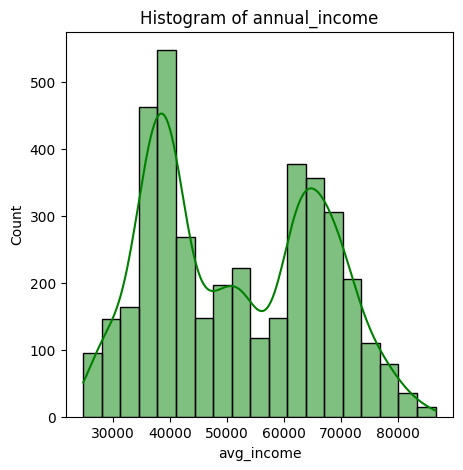

In [181]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust['avg_income'],kde = True , color = 'green',label = 'Data')
plt.title('Histogram of annual_income')
plt.show()

## CHECK OUTLIERS

CHECK NULLVALUES FOR AGE - GROUP

In [182]:
df_cust.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [183]:
# To specifically describe categorical (object) columns
df_cust['age_group'].describe()

count      4000
unique        4
top       25-34
freq       1498
Name: age_group, dtype: object

In [184]:
# First, update the 'age_group' for customers in '45+' to '35-45'
df_cust.loc[df_cust['age_group'] == '45+', 'age_group'] = '35-45'

# Now, rename '35-45' to '35-45+'
df_cust['age_group'] = df_cust['age_group'].replace('35-45', '35-45+')

# Verify the changes by checking the updated unique age groups
df_cust['age_group'].unique()


array(['35-45+', '25-34', '21-24'], dtype=object)

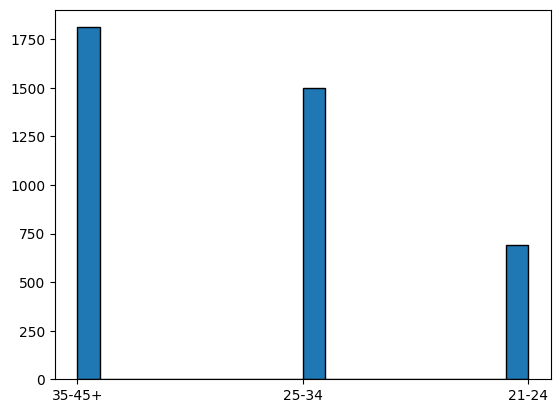

In [185]:
plt.hist(df_cust['age_group'], bins = 20 , edgecolor ='black')
plt.show()

In [186]:
df_cust.to_csv('df_cust.csv', index=False)

In [187]:
# Filter rows where age_group is "25-34"
df_25_34 = df_cust[df_cust['age_group'] == '25-34']

# Group by occupation and summarize data
grouped_data = df_25_34.groupby('occupation').agg({
    'customer_id': 'count',   # Count the number of people in each occupation
    'avg_income': 'mean'     # Calculate the average income for each occupation
}).rename(columns={'customer_id': 'count', 'avg_income': 'average_income'})

# Display grouped data
print(grouped_data)


                          count  average_income
occupation                                     
Business Owners             239    68924.803347
Freelancers                 281    34832.188612
Government Employees        194    52394.128866
Salaried IT Employees       460    62204.132609
Salaried Other Employees    324    38881.904321


In [188]:
average_income_per_occupation = round(df_cust.groupby("occupation")["avg_income"].mean(),2)
average_income_per_occupation

occupation
Business Owners             70091.18
Freelancers                 35058.25
Government Employees        52034.83
Salaried IT Employees       61499.67
Salaried Other Employees    38793.44
Name: avg_income, dtype: float64

In [189]:
average_income_per_occupation.index

Index(['Business Owners', 'Freelancers', 'Government Employees',
       'Salaried IT Employees', 'Salaried Other Employees'],
      dtype='object', name='occupation')

In [190]:
average_income_per_occupation.values

array([70091.18, 35058.25, 52034.83, 61499.67, 38793.44])

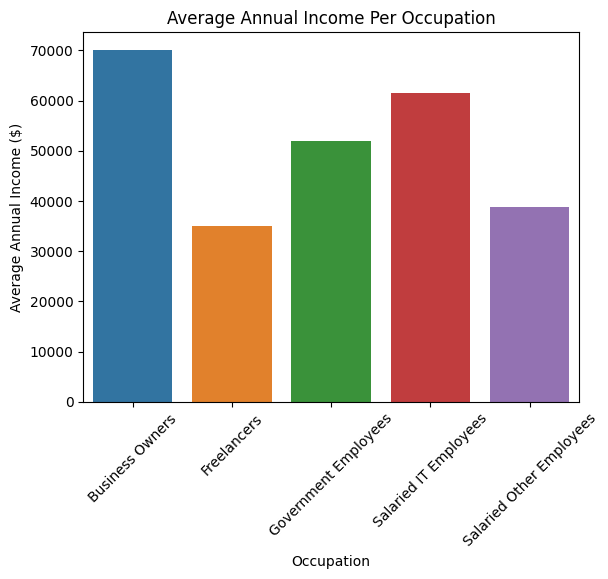

In [107]:
sns.barplot(x=average_income_per_occupation.index , y = average_income_per_occupation.values, palette = "tab10")

plt.xticks(rotation = 45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

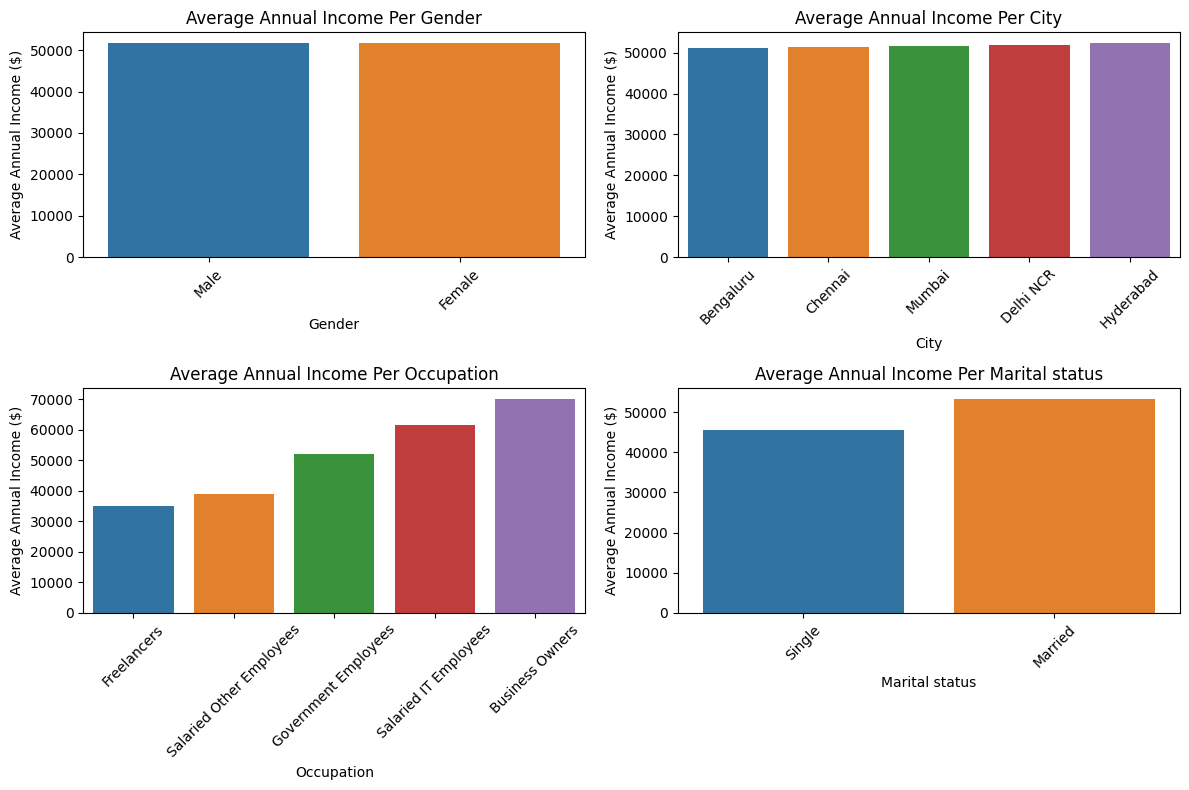

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['gender', 'city', 'occupation', 'marital status']
num_rows = 2
# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 4* num_rows))  #f  2 rows and 2 columns grid
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through each categorical column and plot in the grid
for i, col in enumerate(categorical_columns):
    # Group by the column and calculate the average income
    avg_income_per_group = df_cust.groupby(col)['avg_income'].mean().sort_values()
    
    # Plot the barplot in the correct subplot
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette="tab10", ax=axes[i])
    
    # Customize the plot
    axes[i].set_title(f'Average Annual Income Per {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Annual Income ($)')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [109]:
print(df_cust.duplicated().sum())  # Number of duplicate rows


0


In [110]:
# Clean the 'city' column to remove leading/trailing spaces and standardize case
df_cust['city'] = df_cust['city'].str.strip().str.lower()

# Check the unique values of 'city' again to see if they are consistent
print("Unique cities after cleaning:", df_cust['city'].unique())


Unique cities after cleaning: ['bengaluru' 'hyderabad' 'chennai' 'delhi ncr' 'mumbai']


In [111]:
# Group by 'city' and calculate the mean of avg_income
avg_income_per_city = df_cust.groupby('city')['avg_income'].mean()

# Print the grouped data to check if the incomes differ
print(avg_income_per_city)


city
bengaluru    51073.260985
chennai      51321.392086
delhi ncr    51982.659946
hyderabad    52344.807757
mumbai       51720.314471
Name: avg_income, dtype: float64


In [112]:
# Group by gender and calculate the average income
avg_income_per_gender = df_cust.groupby('gender')['avg_income'].mean()

# Print the grouped data to check if the incomes differ
print(avg_income_per_gender)


gender
Female    51700.726301
Male      51633.427031
Name: avg_income, dtype: float64


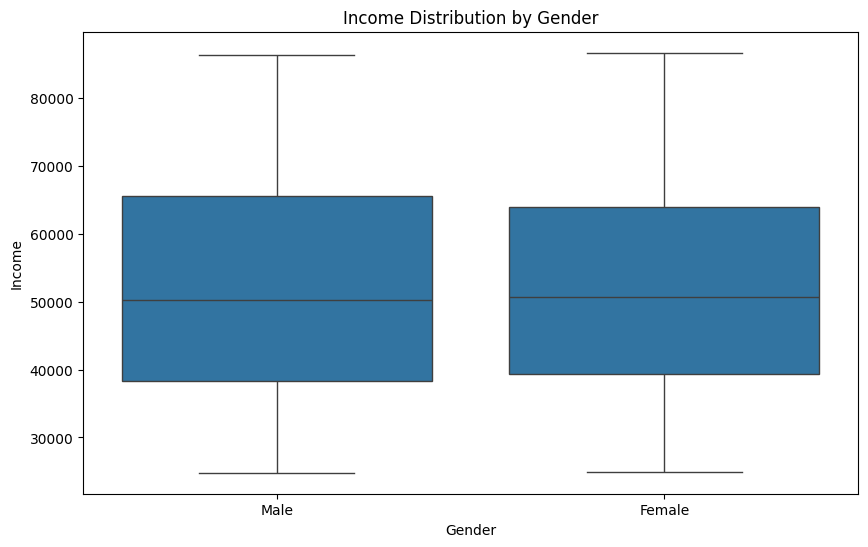

In [113]:


# Check the income distribution by gender using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='avg_income', data=df_cust)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


In [114]:
df_cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,35-45+,bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,delhi ncr,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,bengaluru,Freelancers,Male,Single,28376


In [115]:
df_cust['age_group'].unique()

array(['35-45+', '25-34', '21-24'], dtype=object)

In [116]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
35-45+    45.275
25-34     37.450
21-24     17.275
Name: proportion, dtype: float64

In [117]:



type(age_group_counts)

pandas.core.series.Series

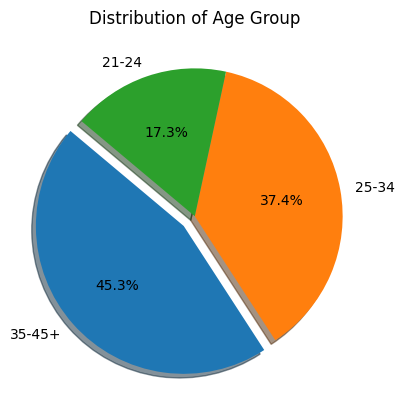

In [118]:
plt.pie(
    age_group_counts,
    labels =age_group_counts.index,
    autopct='%1.1f%%',
    shadow = True,
    explode=(0.1,0,0),
    startangle=140
)
plt.title('Distribution of Age Group')
plt.savefig('Distribution of Age Group.png', dpi=100, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

In [119]:
df_cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,35-45+,bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,delhi ncr,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,bengaluru,Freelancers,Male,Single,28376


In [120]:
df_cust.city.value_counts()

city
mumbai       1078
chennai       834
bengaluru     751
delhi ncr     744
hyderabad     593
Name: count, dtype: int64

In [121]:
df_cust.gender.value_counts()

gender
Male      2597
Female    1403
Name: count, dtype: int64

In [122]:
customer_location_gender= df_cust.groupby(['city','gender']).size().unstack()
customer_location_gender

gender,Female,Male
city,,
bengaluru,255,496
chennai,297,537
delhi ncr,270,474
hyderabad,196,397
mumbai,385,693


<function matplotlib.pyplot.show(close=None, block=None)>

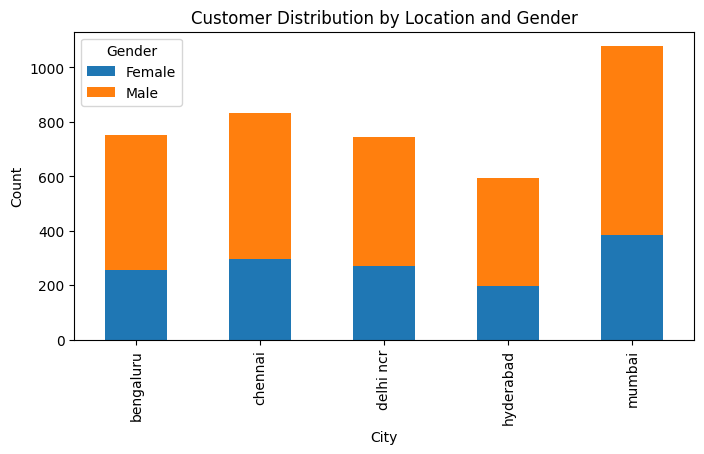

In [123]:
customer_location_gender.plot(kind = "bar" , stacked = True , figsize=(8,4))
plt.title('Customer Distribution by Location and Gender')
plt.legend(title='Gender')
plt.xlabel('City')
plt.ylabel('Count')
plt.show

## SPENDS TABLE CLEANING 

In [124]:
df_spends.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [125]:
df_spends.shape                      

(864000, 5)

In [126]:
df_spends['customer_id'].nunique()

4000

In [127]:
duplicates = df_spends[df_spends.duplicated(subset='customer_id', keep=False)]
print(duplicates)                                  # VIEW ALL DUPLICATE ROWS

       customer_id      month           category payment_type  spend
0       ATQCUS1371       July  Health & Wellness  Credit Card   1114
1       ATQCUS0368    October          Groceries  Credit Card   1466
2       ATQCUS0595        May  Health & Wellness  Credit Card    387
3       ATQCUS0667    October        Electronics  Credit Card   1137
4       ATQCUS3477  September              Bills          UPI   2102
...            ...        ...                ...          ...    ...
863995  ATQCUS1993       June              Bills   Debit Card    897
863996  ATQCUS1063  September              Bills  Credit Card   2680
863997  ATQCUS0416     August             Others  Credit Card    270
863998  ATQCUS3361  September              Bills          UPI    446
863999  ATQCUS1736  September            Apparel          UPI    242

[864000 rows x 5 columns]


In [128]:
spends_sorted = duplicates.sort_values(by='customer_id')
print(spends_sorted)                                       # VIEW SORTED DUPLICATED ROWS

       customer_id      month       category payment_type  spend
710930  ATQCUS0001  September    Electronics          UPI   2219
589047  ATQCUS0001     August    Electronics  Credit Card   2867
341044  ATQCUS0001    October    Electronics          UPI   1965
143349  ATQCUS0001       July      Groceries  Credit Card    745
789201  ATQCUS0001    October  Entertainment          UPI   2144
...            ...        ...            ...          ...    ...
10057   ATQCUS4000    October           Food  Net Banking     66
251455  ATQCUS4000    October      Groceries  Net Banking    147
742189  ATQCUS4000        May        Apparel          UPI    105
561906  ATQCUS4000       June        Apparel  Credit Card    436
311799  ATQCUS4000     August      Groceries  Net Banking    112

[864000 rows x 5 columns]


In [129]:
duplicate_counts = df_spends['customer_id'].value_counts()             #COUNT DUPLICATE OCCURENCE
print(duplicate_counts[duplicate_counts > 1])

customer_id
ATQCUS1371    216
ATQCUS2876    216
ATQCUS0139    216
ATQCUS3635    216
ATQCUS3171    216
             ... 
ATQCUS1464    216
ATQCUS3980    216
ATQCUS3340    216
ATQCUS2075    216
ATQCUS0890    216
Name: count, Length: 4000, dtype: int64


In [130]:
df_spclean = df_spends.drop_duplicates(subset='customer_id', keep='first')
df_spclean.head()                                                          #REMOVE DUPLICATES CLEANED SPEND TABLE

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [131]:
df_spclean.shape 

(4000, 5)

In [132]:
df_spclean.to_csv('df_spclean.csv', index=False)


In [133]:
df_cust.shape

(4000, 7)

In [134]:


duplicates = df_spclean[df_spclean.duplicated(subset='customer_id', keep=False)]
print(duplicates)                                  # VIEW ALL DUPLICATE ROWS    seems no duplicate in spends dataframe 

Empty DataFrame
Columns: [customer_id, month, category, payment_type, spend]
Index: []


In [135]:
df_spclean.isnull().sum()           # Check null values

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [136]:
df_spclean.sample()

,customer_id,month,category,payment_type,spend
525,ATQCUS0063,June,Electronics,UPI,1469


In [137]:
df_spclean.describe()

,spend
count,4000.000000
mean,618.190500
std,674.741625
min,13.000000
25%,189.000000
50%,394.000000
75%,808.000000
max,6755.000000


In [138]:
df_spclean[df_spclean['spend'] == 13]

,customer_id,month,category,payment_type,spend
1791,ATQCUS0590,May,Others,Net Banking,13


In [139]:
df_spclean.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [140]:
df_cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,35-45+,bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,delhi ncr,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,bengaluru,Freelancers,Male,Single,28376


## BIVARIATE ANALYSIS

In [141]:
df_merge = df_cust.merge(df_spclean , on = "customer_id" , how = 'inner')
df_merge.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,35-45+,bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS0809,25-34,hyderabad,Salaried Other Employees,Male,Married,39922,September,Bills,Credit Card,2212
2,ATQCUS0663,25-34,chennai,Salaried Other Employees,Male,Married,37702,June,Apparel,Net Banking,17
3,ATQCUS0452,25-34,delhi ncr,Government Employees,Male,Married,54090,August,Others,Net Banking,59
4,ATQCUS3350,21-24,bengaluru,Freelancers,Male,Single,28376,September,Apparel,Debit Card,304


In [142]:
df_merge.to_csv('df_merge.csv',index = False)

In [143]:
# Filter customers in the '21-24' age group
customers_21_24 = df_merge[df_merge['age_group'] == '21-24']

# Get the count of customers
count_21_24 = customers_21_24.shape[0]

print(f"Number of customers in the age group 21-24: {count_21_24}")


Number of customers in the age group 21-24: 691


In [144]:
df_merge[['avg_income', 'spend']].corr(method='pearson') # Correlation between avg_income and spend  
#correlation of 0.25 indicates Weak Positive correlation

,avg_income,spend
avg_income,1.000000,0.249215
spend,0.249215,1.000000


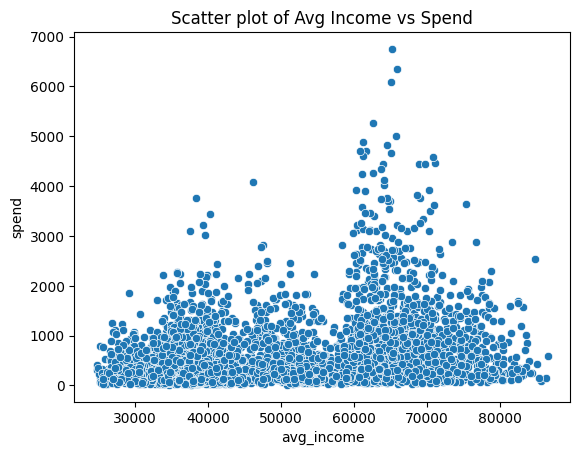

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_merge, x='avg_income', y='spend')
plt.title('Scatter plot of Avg Income vs Spend')
plt.show()


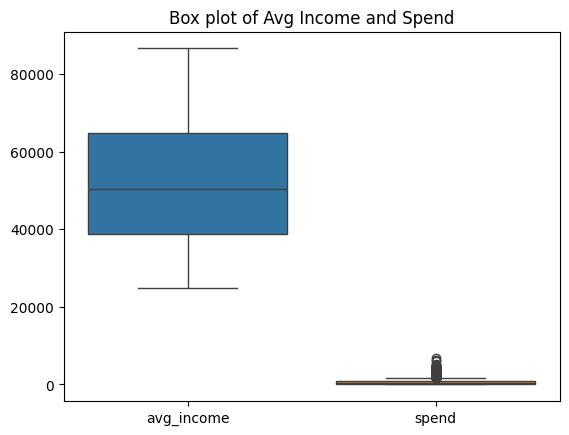

In [146]:
sns.boxplot(data=df_merge[['avg_income', 'spend']])
plt.title('Box plot of Avg Income and Spend')
plt.show()


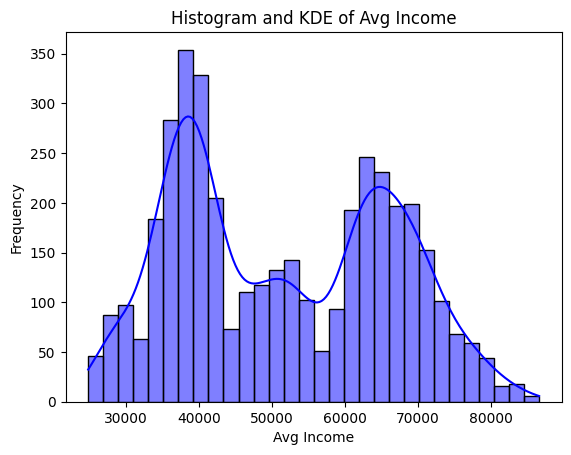

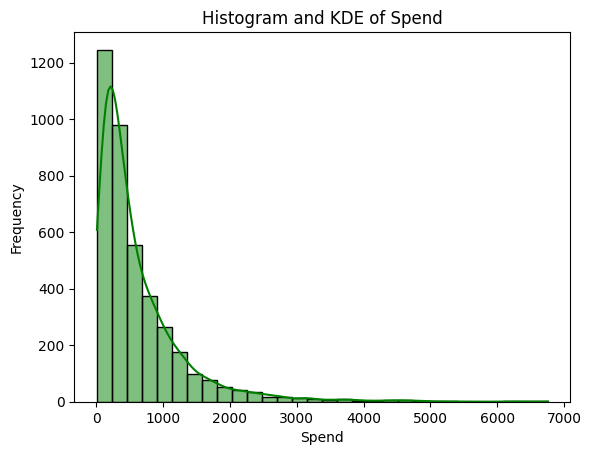

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE for 'avg_income'
sns.histplot(df_merge['avg_income'], kde=True, bins=30, color='blue')
plt.title('Histogram and KDE of Avg Income')
plt.xlabel('Avg Income')
plt.ylabel('Frequency')
plt.show()

# Histogram with KDE for 'spend'
sns.histplot(df_merge['spend'], kde=True, bins=30, color='green')
plt.title('Histogram and KDE of Spend')
plt.xlabel('Spend')
plt.ylabel('Frequency')
plt.show()


In [148]:
from scipy.stats import zscore

df_merge['z_avg_income'] = zscore(df_merge['avg_income'])
df_merge['z_spend'] = zscore(df_merge['spend'])

# Filter rows where z-scores are beyond ±3
outliers = df_merge[(df_merge['z_avg_income'].abs() > 3) | (df_merge['z_spend'].abs() > 3)]
print(outliers)


     customer_id age_group       city             occupation  gender  \
58    ATQCUS1075    35-45+  delhi ncr  Salaried IT Employees    Male   
198   ATQCUS2080     25-34     mumbai  Salaried IT Employees  Female   
262   ATQCUS2213     25-34  delhi ncr  Salaried IT Employees  Female   
280   ATQCUS0012     21-24     mumbai  Salaried IT Employees    Male   
306   ATQCUS0002     21-24     mumbai  Salaried IT Employees    Male   
...          ...       ...        ...                    ...     ...   
3769  ATQCUS2556    35-45+     mumbai  Salaried IT Employees  Female   
3800  ATQCUS0138     25-34     mumbai  Salaried IT Employees    Male   
3852  ATQCUS3509     25-34  delhi ncr  Salaried IT Employees    Male   
3931  ATQCUS2718    35-45+  bengaluru  Salaried IT Employees  Female   
3936  ATQCUS1074    35-45+  delhi ncr  Salaried IT Employees    Male   

     marital status  avg_income      month           category payment_type  \
58          Married       62738     August        Electro

<Axes: xlabel='age_group', ylabel='spend'>

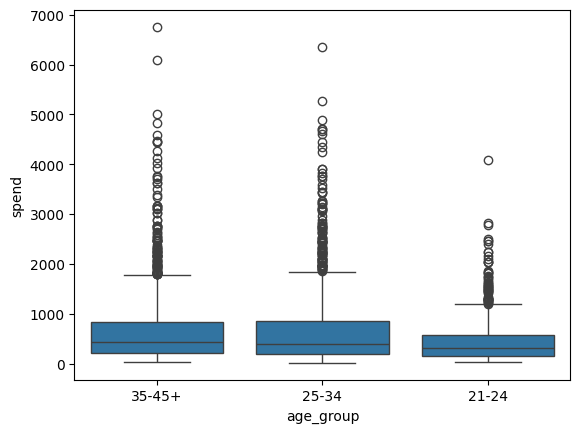

In [149]:
sns.boxplot(x='age_group', y='spend', data=df_merge)

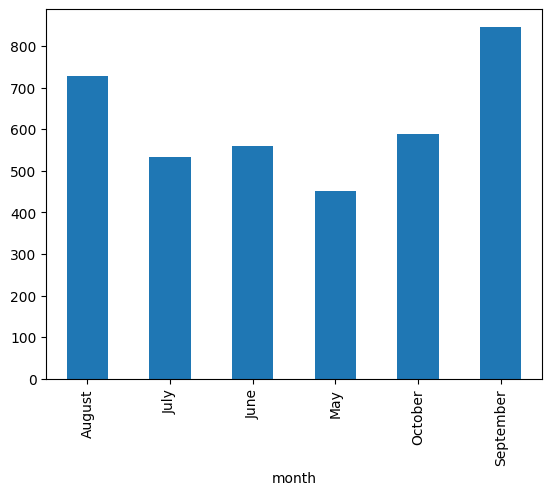

In [150]:
df_merge.groupby('month')['spend'].mean().plot(kind='bar')     # Seasonal correlation 
plt.show()

In [151]:
# Payment type preference by occupation
print(pd.crosstab(df_merge['occupation'], df_merge['payment_type']))

payment_type              Credit Card  Debit Card  Net Banking  UPI
occupation                                                         
Business Owners                   156         146          173  155
Freelancers                       191         207          202  184
Government Employees               96         100          105   98
Salaried IT Employees             312         346          304  332
Salaried Other Employees          222         207          255  209


In [152]:
df_merge.loc[58]

customer_id                  ATQCUS1075
age_group                        35-45+
city                          delhi ncr
occupation        Salaried IT Employees
gender                             Male
marital status                  Married
avg_income                        62738
month                            August
category                    Electronics
payment_type                Credit Card
spend                              3390
z_avg_income                   0.754408
z_spend                         4.10847
Name: 58, dtype: object

In [153]:
df_spclean.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [154]:
df_spclean.category.unique()

array(['Health & Wellness', 'Groceries', 'Electronics', 'Bills',
       'Entertainment', 'Apparel', 'Food', 'Others', 'Travel'],
      dtype=object)

In [155]:
df_spclean.category.mode()

0    Health & Wellness
Name: category, dtype: object

In [156]:
df_spclean.category.value_counts()

category
Health & Wellness    471
Apparel              469
Travel               467
Entertainment        450
Food                 436
Bills                434
Groceries            426
Others               425
Electronics          422
Name: count, dtype: int64

In [157]:
payment_type_count = df_spclean.groupby(['category', 'payment_type']).size().reset_index(name='count')
print(payment_type_count)

             category payment_type  count
0             Apparel  Credit Card     96
1             Apparel   Debit Card    138
2             Apparel  Net Banking    124
3             Apparel          UPI    111
4               Bills  Credit Card    102
5               Bills   Debit Card    109
6               Bills  Net Banking    120
7               Bills          UPI    103
8         Electronics  Credit Card    120
9         Electronics   Debit Card    100
10        Electronics  Net Banking    104
11        Electronics          UPI     98
12      Entertainment  Credit Card    103
13      Entertainment   Debit Card    117
14      Entertainment  Net Banking    119
15      Entertainment          UPI    111
16               Food  Credit Card    116
17               Food   Debit Card     89
18               Food  Net Banking    112
19               Food          UPI    119
20          Groceries  Credit Card    107
21          Groceries   Debit Card    115
22          Groceries  Net Banking

<Axes: xlabel='count', ylabel='category'>

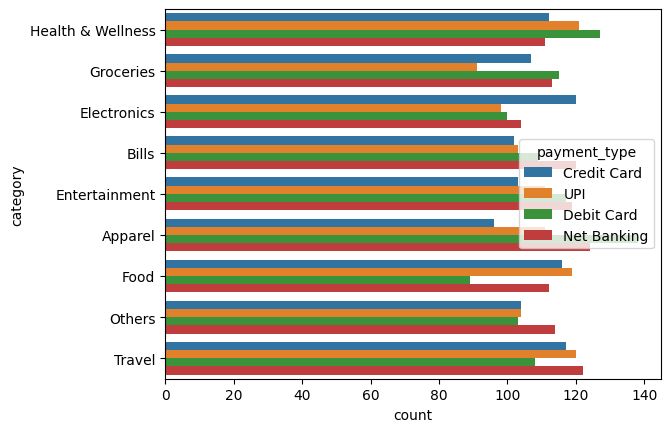

In [158]:
sns.countplot(y="category", hue="payment_type" ,data=df_spclean, palette="tab10" )

In [159]:
df_spclean.describe()

,spend
count,4000.000000
mean,618.190500
std,674.741625
min,13.000000
25%,189.000000
50%,394.000000
75%,808.000000
max,6755.000000


In [160]:
Q1, Q3 = df_spclean['spend'].quantile([0.25,0.75])
IQR = Q3 -Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR
lower , upper

(-1049.0, 2046.0)

In [161]:
df_spclean[df_spclean.spend>=upper]

,customer_id,month,category,payment_type,spend
4,ATQCUS3477,September,Bills,UPI,2102
19,ATQCUS2564,May,Health & Wellness,Debit Card,2158
84,ATQCUS3451,August,Groceries,UPI,2776
92,ATQCUS0321,August,Bills,Debit Card,2078
165,ATQCUS1233,September,Health & Wellness,Credit Card,2705
...,...,...,...,...,...
13048,ATQCUS1655,October,Bills,Credit Card,4586
13058,ATQCUS0459,May,Electronics,Credit Card,2449
13561,ATQCUS2317,August,Bills,Credit Card,2210
15865,ATQCUS0124,July,Groceries,UPI,2616


In [162]:
filtered_customers = df_merge[df_merge['spend'] > df_merge['avg_income']]['customer_id']
print(filtered_customers)


Series([], Name: customer_id, dtype: object)


<Axes: xlabel='payment_type', ylabel='percent'>

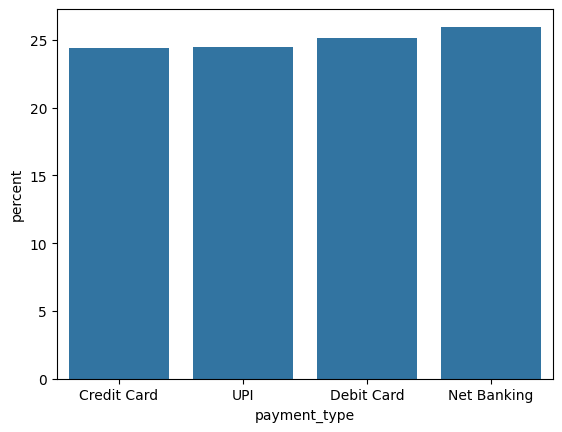

In [163]:
sns.countplot(x=df_spclean.payment_type, stat= 'percent')

## DIFFERENT PAYMENT TYPE PER AGE GROUP

In [164]:
df_merge.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,z_avg_income,z_spend
0,ATQCUS1825,35-45+,bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,1.488665,-0.315998
1,ATQCUS0809,25-34,hyderabad,Salaried Other Employees,Male,Married,39922,September,Bills,Credit Card,2212,-0.798937,2.362399
2,ATQCUS0663,25-34,chennai,Salaried Other Employees,Male,Married,37702,June,Apparel,Net Banking,17,-0.950078,-0.891105
3,ATQCUS0452,25-34,delhi ncr,Government Employees,Male,Married,54090,August,Others,Net Banking,59,0.165640,-0.828851
4,ATQCUS3350,21-24,bengaluru,Freelancers,Male,Single,28376,September,Apparel,Debit Card,304,-1.585005,-0.465704


In [165]:
df_merge.age_group.unique()

array(['35-45+', '25-34', '21-24'], dtype=object)

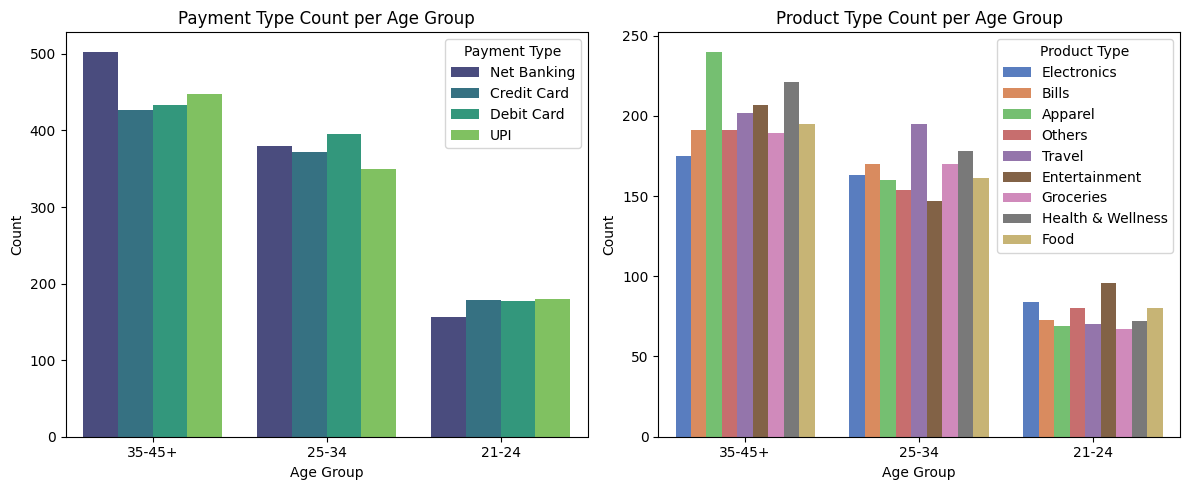

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for side-by-side visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Corrected 'fix' to 'fig'

# Plot 1: Payment type count per Age Group
sns.countplot(x='age_group', hue='payment_type', data=df_merge, palette='viridis', ax=ax1)
ax1.set_title("Payment Type Count per Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Payment Type", loc='upper right')

# Plot 2: Product type count per Age Group
sns.countplot(x='age_group', hue='category', data=df_merge, palette='muted', ax=ax2)
ax2.set_title("Product Type Count per Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Type", loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plots as a single image
plt.savefig('side_by_side_plots.png', dpi=100, bbox_inches='tight')

# Show the plots
plt.show()


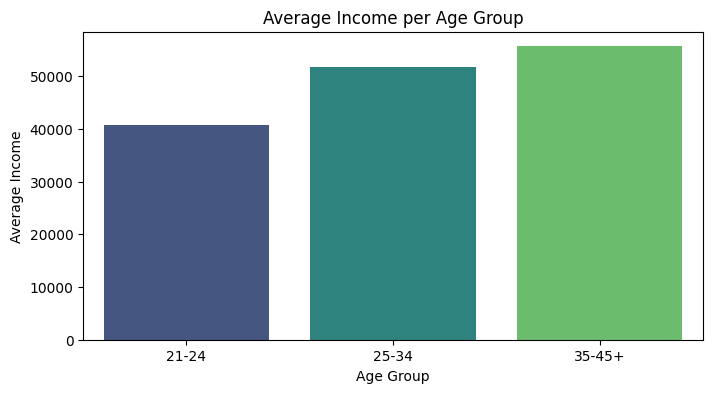

In [167]:
# Group by 'age_group' and calculate the mean of 'avg_income'
age_group_income = df_merge.groupby('age_group')['avg_income'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the bar plot
sns.barplot(x='age_group', y='avg_income', data=age_group_income, palette='viridis')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income per Age Group')
# Save the plot as an image
plt.savefig('average_income_age_group.png', dpi=100, bbox_inches='tight')  # Save as PNG with high resolution
# Show the plot
plt.show()

In [168]:
#Target mareket seems to be people with age group 21-24